In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt

print(os.listdir())

df = pd.read_csv('../../Data/EV_Data.csv')
df.head()



['Analise_Exploratoria.ipynb']


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [4]:
print(f"Numero de Linhas: {len(df)}(DataPoints)")
print("--------------------------")
print(f"Tendo Colunas: ")

for col in df.columns:
    print(col)

print("--------------------------")

Numero de Linhas: 3798(DataPoints)
--------------------------
Tendo Colunas: 
region
category
parameter
mode
powertrain
year
unit
value
--------------------------


In [5]:
print("--------------------------")
print("Parametros distintos na coluna 'parameters':")
for param in df['parameter'].unique():
    print(param)
print("--------------------------")

--------------------------
Parametros distintos na coluna 'parameters':
EV sales
EV stock share
EV sales share
EV stock
Electricity demand
Oil displacement Mbd
Oil displacement, million lge
--------------------------


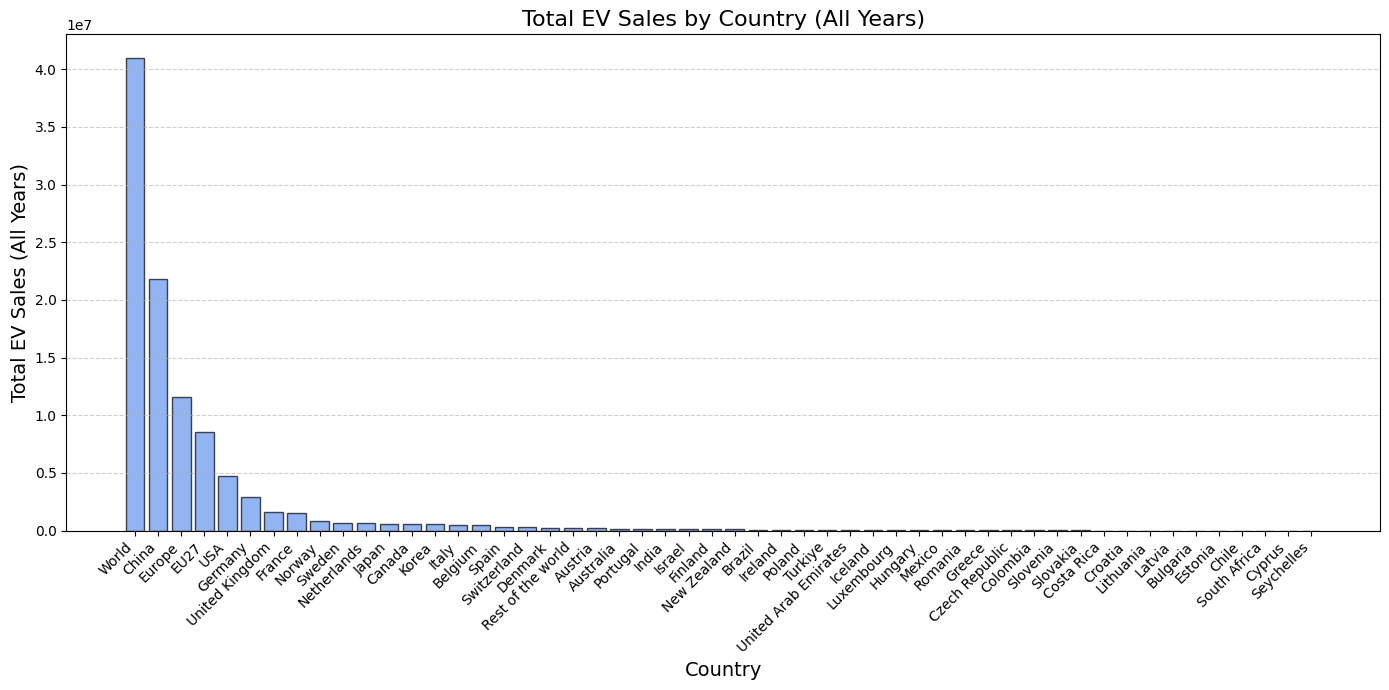

In [6]:

# Filtra apenas linhas com parâmetro 'EV sales'
ev_sales_df = df[df['parameter'] == 'EV sales'].copy()

# Agrupa por país, somando todas as vendas de todos os anos
country_sales = ev_sales_df.groupby('region')['value'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(country_sales.index, country_sales.values, color='cornflowerblue', edgecolor='black', alpha=0.7)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total EV Sales (All Years)', fontsize=14)
plt.title('Total EV Sales by Country (All Years)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
def compare_linked(region, p1, p2):
    region_df = df[df['region'] == region].copy()

    pivot_df = (
        region_df
        .pivot_table(
            index='year',
            columns='parameter',
            values='value',
            aggfunc='sum'
        )
    )

    # Guarantee both columns exist and in the right order
    if p1 not in pivot_df.columns or p2 not in pivot_df.columns:
        print(f"Columns available: {pivot_df.columns.tolist()}")
        raise ValueError(f"Parameters '{p1}' or '{p2}' not found for region '{region}'.")

    pivot_df = pivot_df[[p1, p2]]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    color1 = 'tab:blue'
    ax1.set_xlabel('Year', fontsize=14)
    ax1.set_ylabel(p1, color=color1, fontsize=14)

    ln1 = ax1.plot(pivot_df.index, pivot_df[p1], marker='o', color=color1, linewidth=2, label=p1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = 'tab:green'
    ax2.set_ylabel(p2, color=color2, fontsize=14)
    ln2 = ax2.plot(pivot_df.index, pivot_df[p2], marker='o', color=color2, linewidth=2, label=p2)
    ax2.tick_params(axis='y', labelcolor=color2)

    lns = ln1 + ln2
    labels = [l.get_label() for l in lns]
    ax1.legend(lns, labels, loc='upper left', fontsize=12)

    plt.title(f'{p1} and {p2} Over Time in {region}', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [8]:
def compare(region, p1, p2):
    region_df = df[df['region'] == region].copy()

    pivot_df = (
        region_df
        .pivot_table(
            index='year',
            columns='parameter',
            values='value',
            aggfunc='sum'
        )
    )

    # Guarantee both columns exist and in the right order
    if p1 not in pivot_df.columns or p2 not in pivot_df.columns:
        print(f"Columns available: {pivot_df.columns.tolist()}")
        raise ValueError(f"Parameters '{p1}' or '{p2}' not found for region '{region}'.")

    pivot_df = pivot_df[[p1, p2]]

    fig, ax = plt.subplots(figsize=(12, 6))

    color1 = 'tab:blue'
    color2 = 'tab:green'

    ax.plot(pivot_df.index, pivot_df[p1], marker='o', color=color1, linewidth=2, label=p1)
    ax.plot(pivot_df.index, pivot_df[p2], marker='o', color=color2, linewidth=2, label=p2)

    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)
    ax.tick_params(axis='y')
    ax.legend(loc='upper left', fontsize=12)
    plt.title(f'{p1} and {p2} Over Time in {region}', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# EV Stock vs EV sales

Stock vs Sales


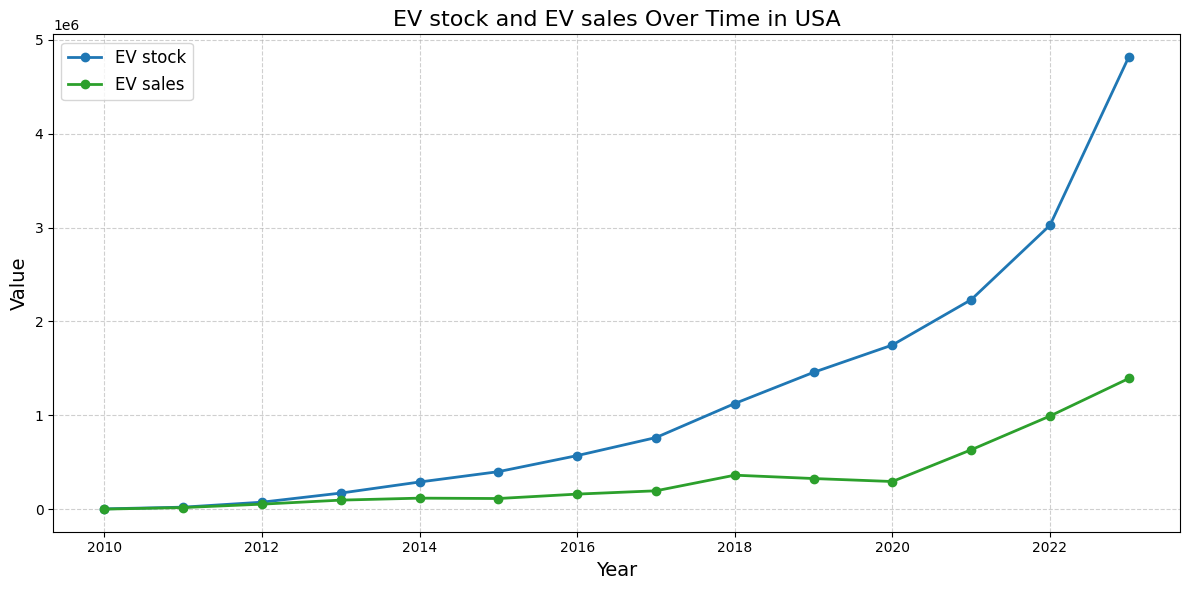

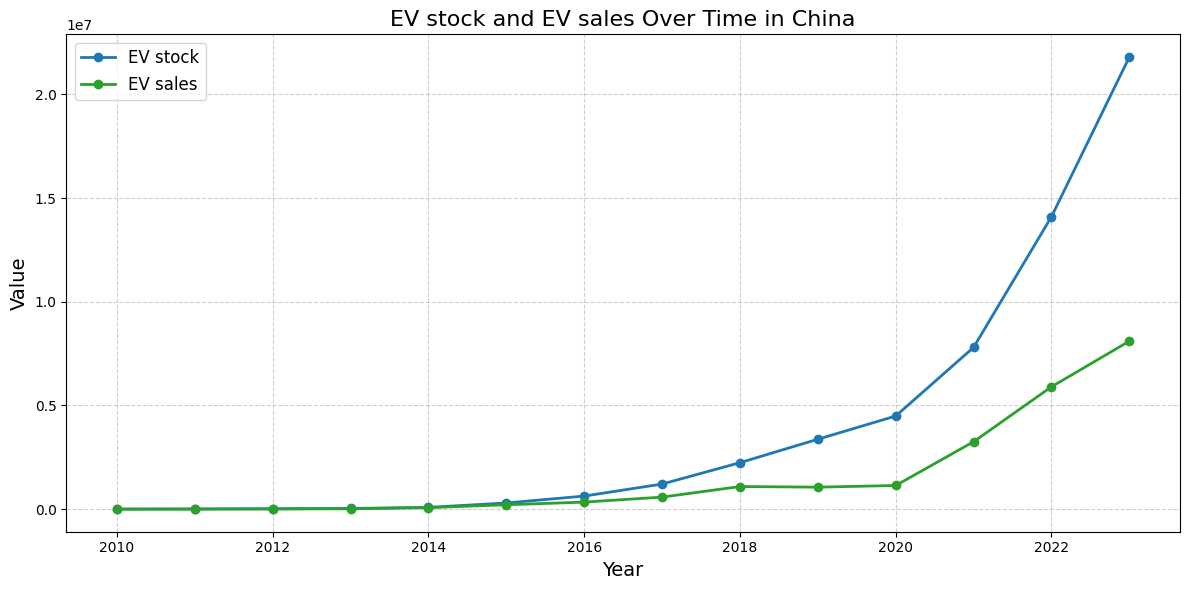

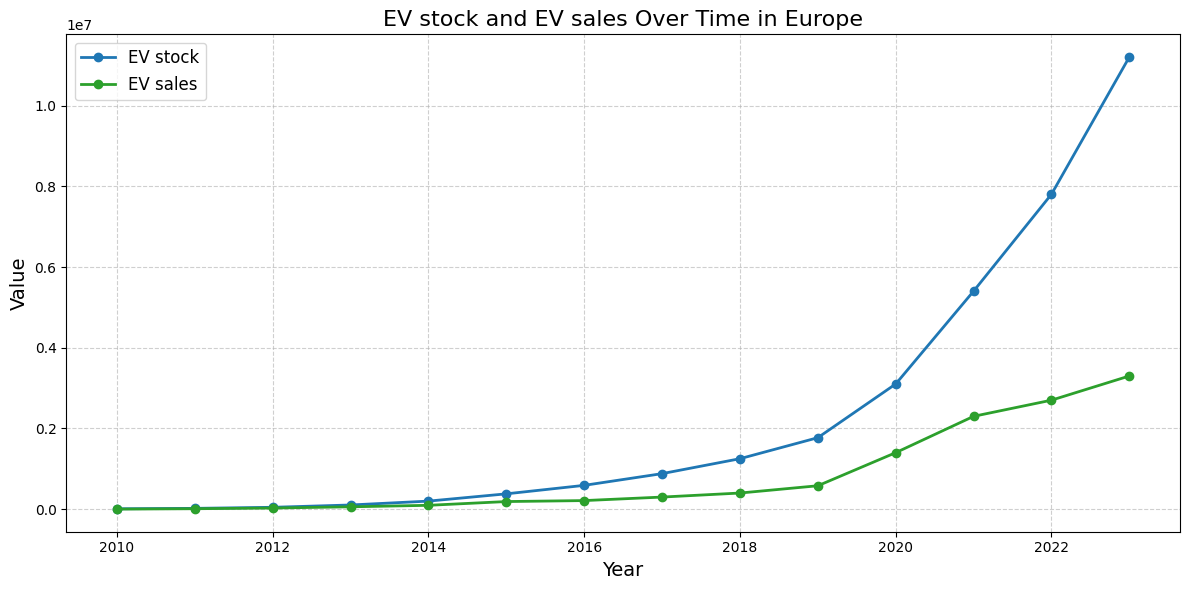

In [9]:
print("Stock vs Sales")
compare('USA', 'EV stock', 'EV sales')
compare('China', 'EV stock', 'EV sales')
compare('Europe', 'EV stock', 'EV sales')


# Electricity demand vs EV sales

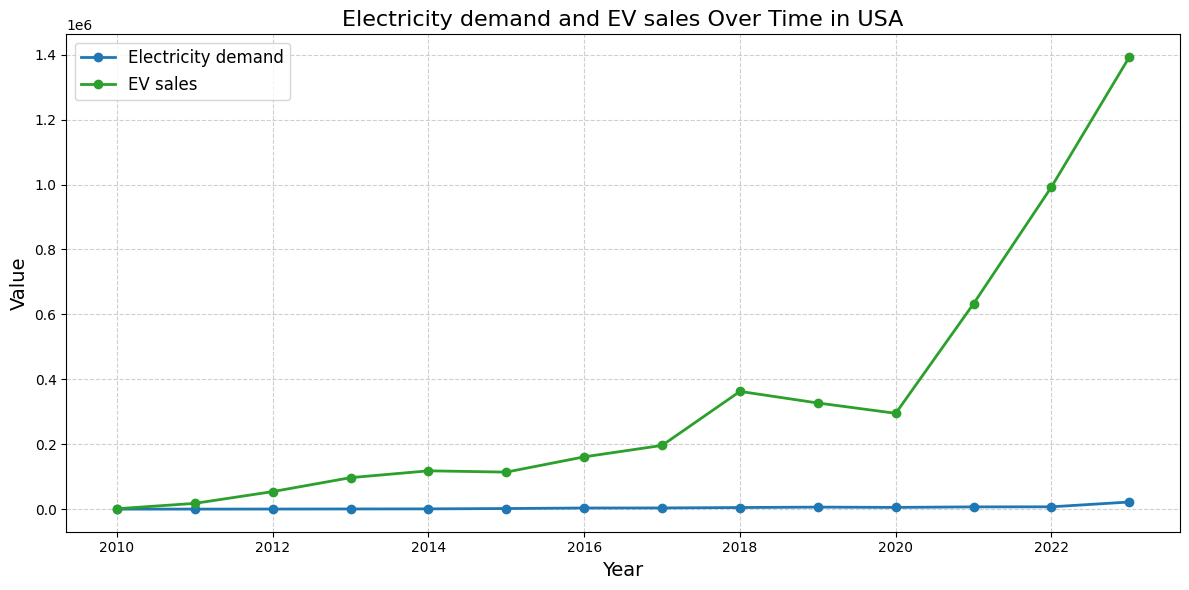

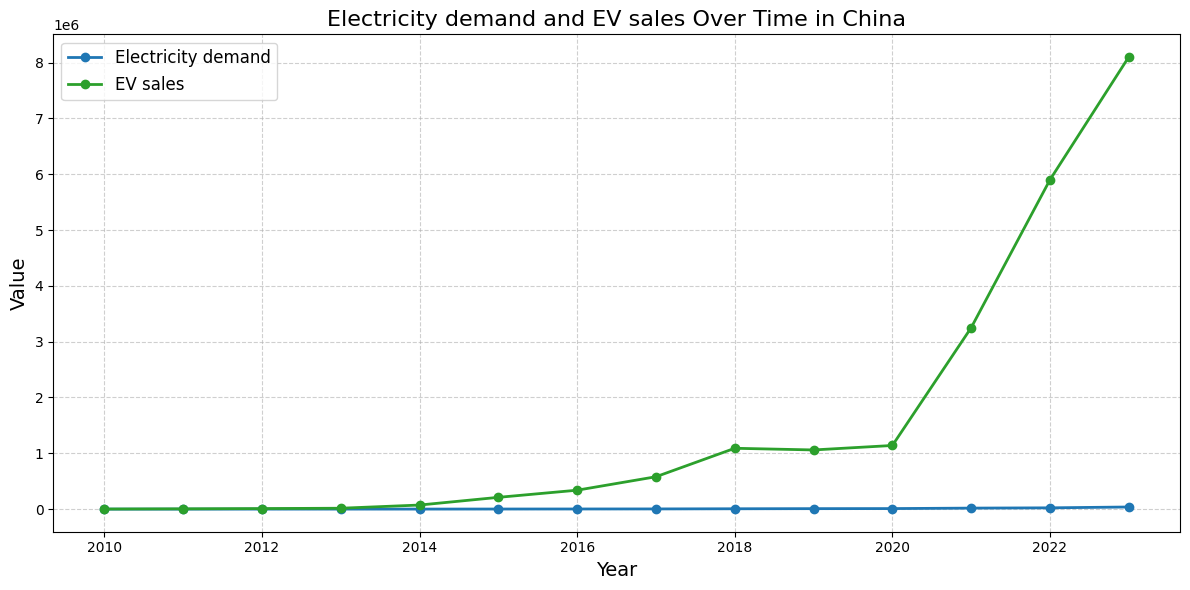

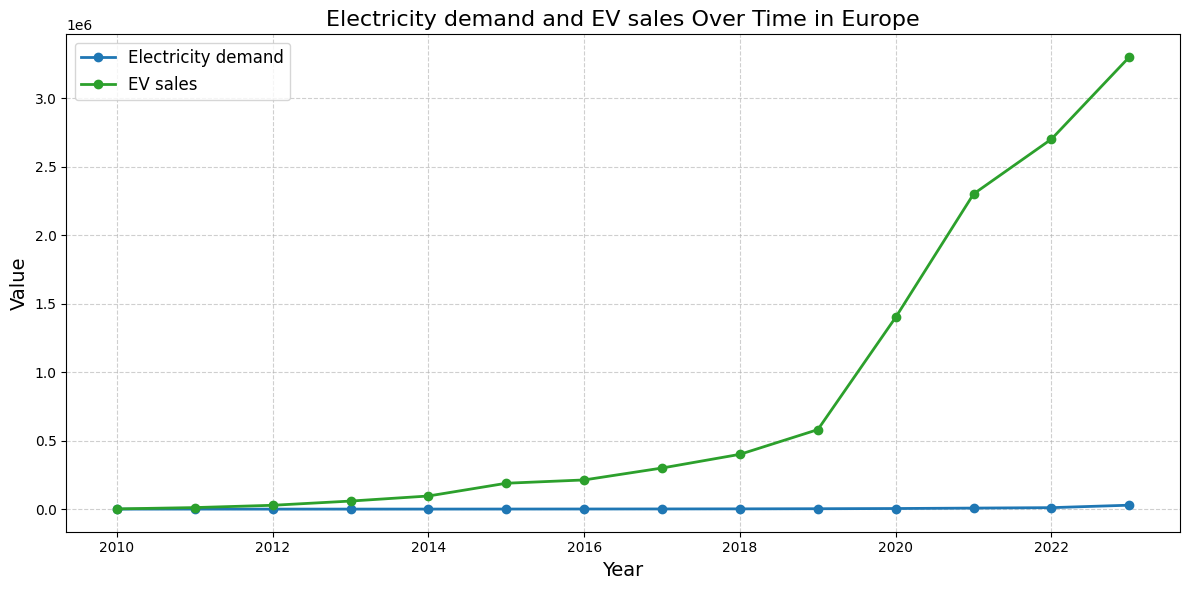

In [10]:
compare('USA', 'Electricity demand', 'EV sales')
compare('China', 'Electricity demand', 'EV sales')
compare('Europe', 'Electricity demand', 'EV sales')

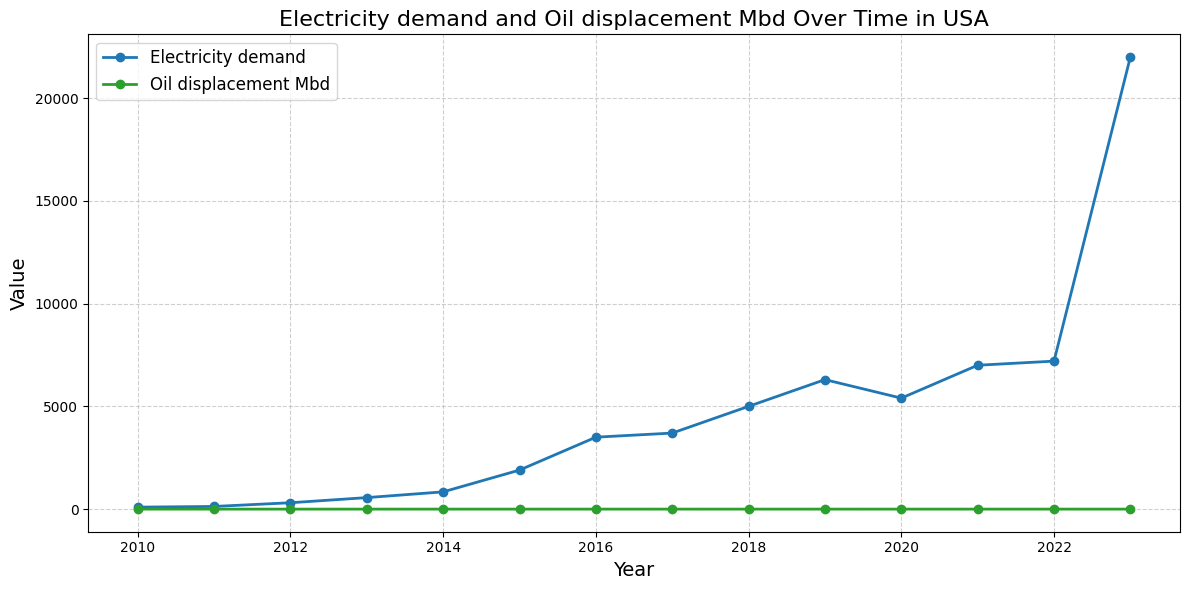

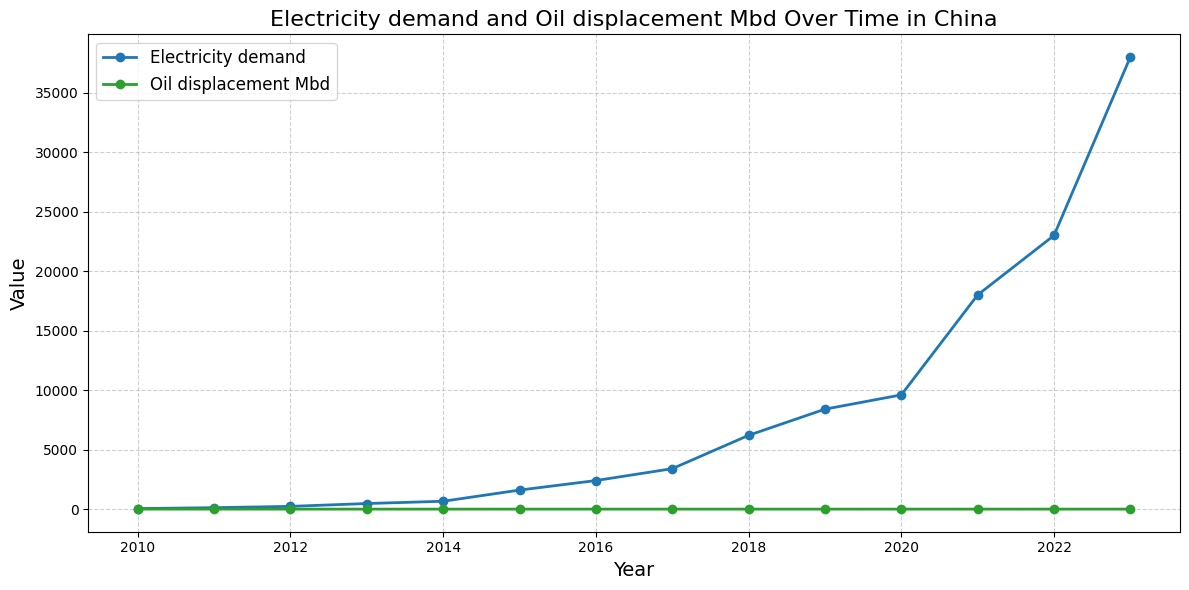

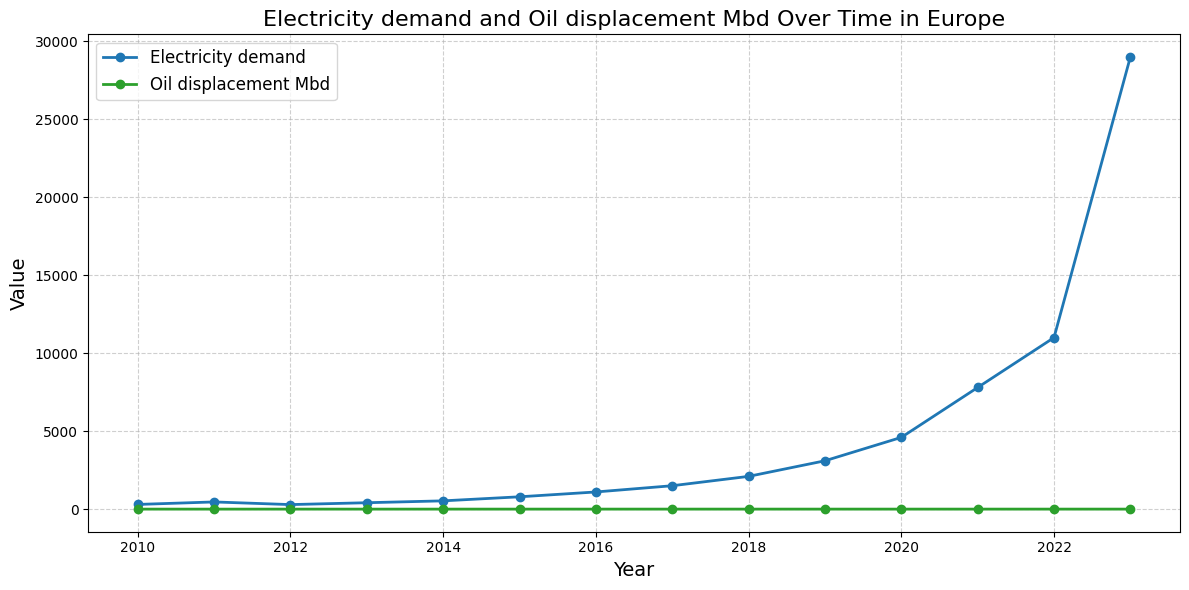

In [13]:
compare('USA', 'Electricity demand', 'Oil displacement Mbd')
compare('China', 'Electricity demand', 'Oil displacement Mbd')
compare('Europe', 'Electricity demand', 'Oil displacement Mbd')